In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [50]:
seed = 0
planet_max_size = 25
rng = np.random.RandomState(seed)

(array([0.1775    , 0.01458333, 0.01291667, 0.00458333, 0.00333333,
        0.00666667, 0.00375   , 0.01333333, 0.0125    , 0.1675    ]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

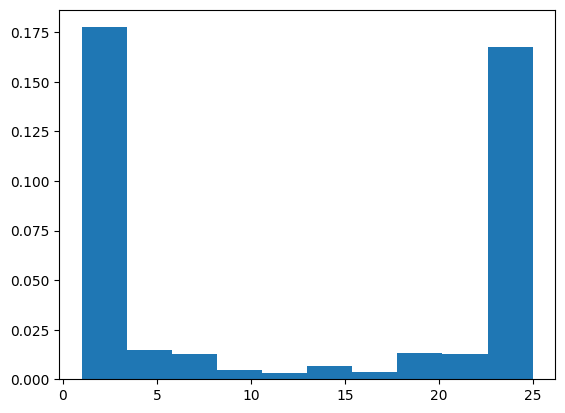

In [51]:
# beta distribution plot - Jovian world size
a = b = 0.1
samples = 1000
beta = rng.beta(
    a,
    b,
    samples
)
beta = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    beta.reshape(-1, 1)
)

# convert to int
beta = beta.astype(int)

plt.hist(beta, density=True)

(array([0.39      , 0.01125   , 0.01      , 0.00208333, 0.00125   ,
        0.00125   , 0.        , 0.00041667, 0.        , 0.00041667]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

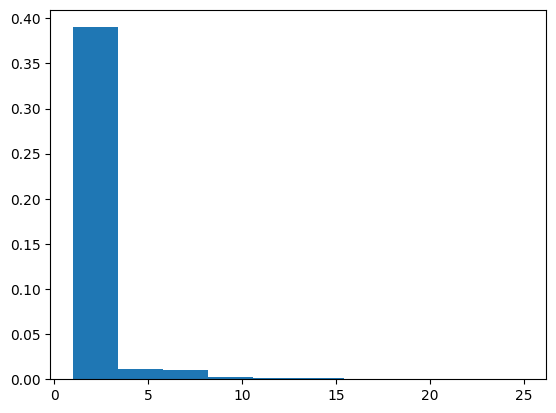

In [52]:
# gamma distribution plot - icy worlds size
target_mean = 2.5
k = .1
theta = target_mean / k
samples = 1000
gamma = rng.gamma(
    k,
    theta,
    samples
)
# rescale to between 1 and 25 (just shift and scale)
gamma = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gamma.reshape(-1, 1)
)

# convert to int
gamma = gamma.astype(int)

plt.hist(gamma, density=True)

(6000,)


(array([0.00026667, 0.00386667, 0.02813333, 0.02453333, 0.00973333,
        0.0028    , 0.072     , 0.13566667, 0.11366667, 0.00933333]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

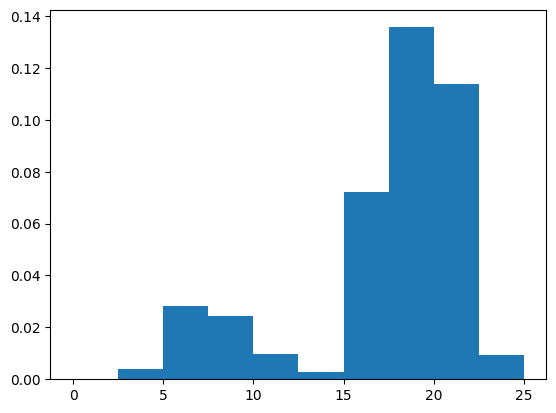

In [53]:
# sol like world size - two gaussians combined
mu1 = 1
seperation = 3
sigma = .5
repeats = 5
mu2 = mu1 + seperation
samples = 1000
gauss1 = rng.normal(
    mu1,
    sigma,
    samples
)
gauss2 = rng.normal(
    mu2,
    sigma,
    samples
)
gauss = np.concatenate((gauss1, np.repeat(gauss2, 5)))

print(gauss.shape)

# rescale to between 1 and 25 (just shift and scale)
gauss = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gauss.reshape(-1, 1)
)

# convert to int
gauss = gauss.astype(int)

plt.hist(gauss, density=True)

The slope is [0.03] and the intercept is 1.0658141036401503e-14
33.333333333333336


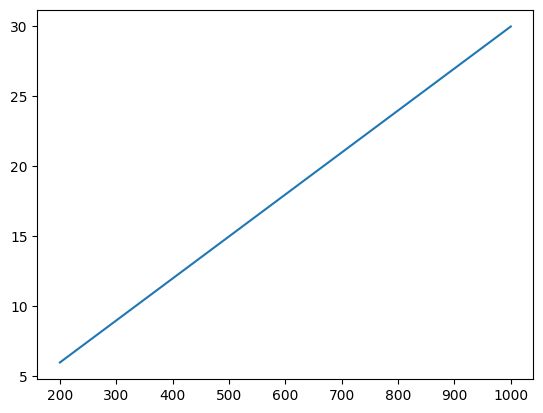

In [54]:
x = [200, 400, 600, 800, 1000]
y = [6, 12, 18, 24, 30]

# lin reg
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
print(f"The slope is {reg.coef_} and the intercept is {reg.intercept_}")

print(800 / 24)

plt.plot(x, y)

In [55]:
stars = [1, 2, 3, 4, 5]

a = np.random.randn(10, 2)
b = np.random.randn(10, )

print(a.shape)
print(b.shape)

np.concatenate((a, b.reshape(-1, 1)), axis=1)

(10, 2)
(10,)


array([[ 0.33745988,  0.46972891,  0.42529375],
       [-1.37837703, -0.30982278,  1.23693306],
       [ 0.01342189,  0.3323623 ,  1.14831458],
       [ 0.9318986 , -2.32932054, -0.58447175],
       [ 0.48630398,  0.86394952,  0.41513609],
       [ 0.74724815,  0.64552265, -0.74993721],
       [ 1.67048998,  0.51929488,  1.26684635],
       [ 1.35803762,  0.33993466, -0.9293631 ],
       [-2.09953048,  0.89267335, -1.79667282],
       [ 1.21765308, -0.0345729 ,  0.91152984]])

2023-11-20 15:29:48,208 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-20 15:29:48,209 INFO sqlalchemy.engine.Engine PRAGMA foreign_keys=ON
2023-11-20 15:29:48,209 INFO sqlalchemy.engine.Engine [generated in 0.00071s] ()
2023-11-20 15:29:48,211 INFO sqlalchemy.engine.Engine SELECT planet.planet_size AS planet_planet_size 
FROM planet
2023-11-20 15:29:48,211 INFO sqlalchemy.engine.Engine [generated in 0.00063s] ()
Min planet size: 2
Max planet size: 25
2023-11-20 15:29:48,478 INFO sqlalchemy.engine.Engine COMMIT


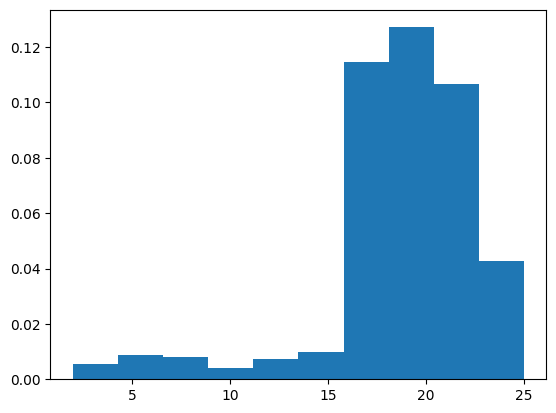

In [56]:
from src.models import Planet
from src.database.db import get_session
from sqlalchemy import create_engine

db = "../../data/sqlite.db"

engine = create_engine(f"sqlite:///{db}", echo=True)


def plot_planet_size_dist():
    with get_session(engine) as session:
        all_planets = session.query(Planet.planet_size).all()
        all_planets = np.array(all_planets).flatten()

        # print the min and max size
        print(f"Min planet size: {np.min(all_planets)}")
        print(f"Max planet size: {np.max(all_planets)}")

        plt.hist(all_planets, density=True)


plot_planet_size_dist()

In [57]:
# print cwd
import os

print(os.getcwd())

/Users/ac4294/dev/2023/spaceships-database/src/scratch


In [58]:
rng.binomial(1, .5, 10)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

2023-11-20 15:36:02,254 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-20 15:36:02,255 INFO sqlalchemy.engine.Engine PRAGMA foreign_keys=ON
2023-11-20 15:36:02,257 INFO sqlalchemy.engine.Engine [cached since 374s ago] ()
2023-11-20 15:36:02,258 INFO sqlalchemy.engine.Engine SELECT biome.biome_name AS biome_biome_name, count(planet.planet_biome) AS count_1 
FROM biome JOIN planet ON biome.biome_id = planet.planet_biome GROUP BY biome.biome_name
2023-11-20 15:36:02,259 INFO sqlalchemy.engine.Engine [cached since 373.6s ago] ()
Total habitable planets: 7627 out of 684870
2023-11-20 15:36:02,890 INFO sqlalchemy.engine.Engine COMMIT


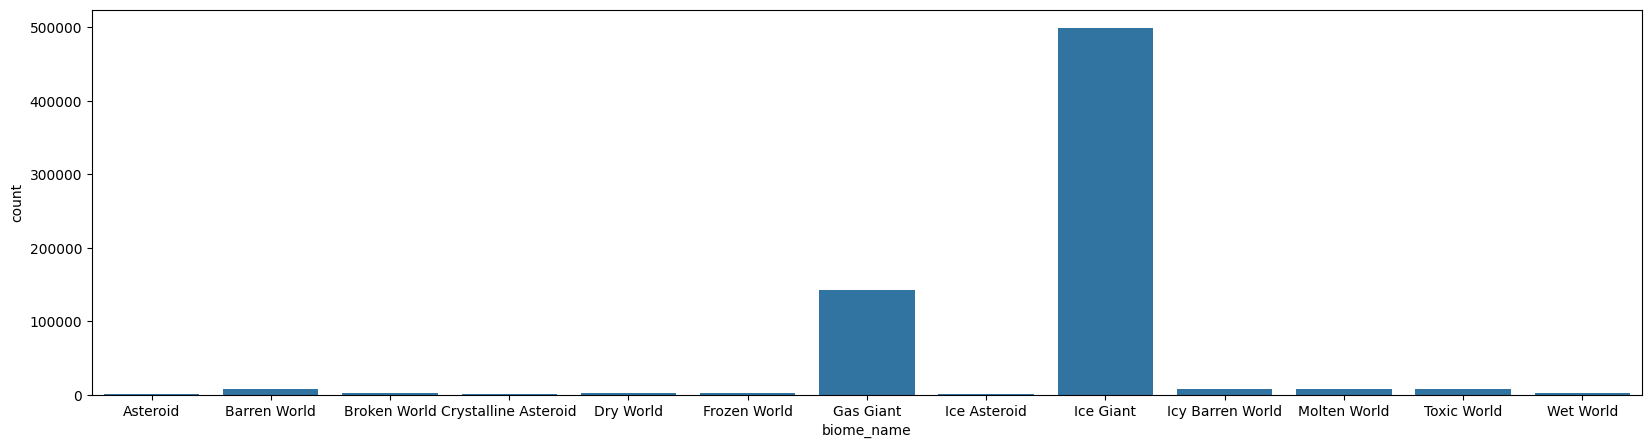

In [67]:
from sqlalchemy import func
from src.models import Biome


def plot_planet_by_biome():
    with get_session(engine) as session:
        # get:
        """
        SELECT biome.biome_name, COUNT(planet.biome_id) AS count
        FROM planet
        INNER JOIN biome ON planet.biome_id = biome.biome_id
        """
        biome_count = session.query(Biome.biome_name, func.count(Planet.planet_biome)).join(Planet).group_by(
            Biome.biome_name).all()

        # convert to df
        biome_count = pd.DataFrame(biome_count, columns=["biome_name", "count"])

        # print number habitable (Dry World, Frozen World, Wet World)
        habitable = biome_count[biome_count["biome_name"].isin(["Dry World", "Frozen World", "Wet World"])]
        print(f"Total habitable planets: {habitable['count'].sum()} out of {biome_count['count'].sum()}")

        # plot (increase size)

        plt.figure(figsize=(20, 5))
        sns.barplot(x="biome_name", y="count", data=biome_count)


plot_planet_by_biome()


In [60]:
31 + 17 + 24

72